# Simple RNN 구축

## cos 함수로 시계열(Time Series) 만들기

In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
np.random.seed(10)

time = np.arange(30 * 12 + 1)
month = (time % 30) / 30

time_series = 20 * np.where(month < 0.5,
                           np.cos(2 * np.pi * month),
                           np.cos(2 * np.pi * month) + np.random.random(361))

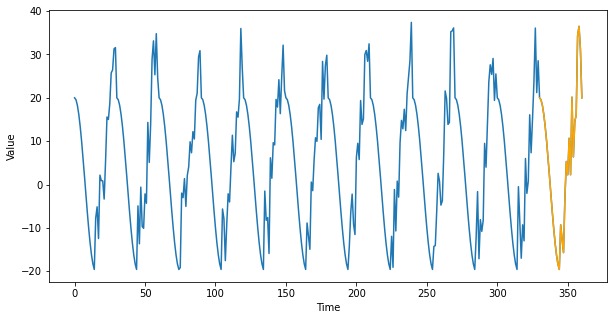

In [93]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('Value')

plt.plot(time, time_series)
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], color='orange')
plt.show()

### 데이터 전처리

In [94]:
def make_sequence(time_series, n):
    X_train = []
    y_train = []
    
    for i in range(len(time_series)):
        x = time_series[i:(i+n)]
        if (i+n) < len(time_series):
            X_train.append(x)
            y_train.append(time_series[i+n])
        else:
            break
    return np.array(X_train), np.array(y_train)


In [95]:
n = 10

X_train, y_train = make_sequence(time_series, n)
print(X_train.shape)
print(y_train.shape)

(351, 10)
(351,)


In [96]:
X_train = X_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)

(351, 10, 1)
(351, 1)


### Train, Test Split

In [97]:
from sklearn.model_selection import train_test_split

X_train_partial, X_test, y_train_partial, y_test = train_test_split(X_train, y_train,
                                                                   test_size=0.06)
print(X_train_partial.shape)
print(y_train_partial.shape)
print(X_test.shape)
print(y_test.shape)

(329, 10, 1)
(329, 1)
(22, 10, 1)
(22, 1)


### 데이터 형태 확인하기

In [98]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, n)

for i in range(1, 4):
    print(a[i], '|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


### Simple RNN 모델 만들기

In [100]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model_rnn = Sequential([
    SimpleRNN(32, activation='tanh', input_shape=(n, 1)),
    Dense(1, activation='linear')
])

model_rnn.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

model_rnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [101]:
model_rnn.fit(X_train_partial, y_train_partial,
          epochs=500,
          batch_size=64,
          validation_split=0.2)

Train on 263 samples, validate on 66 samples
Epoch 1/500
263/263 [==============================] - 3s 11ms/sample - loss: 251.6919 - mae: 13.4848 - val_loss: 311.5642 - val_mae: 15.1667
Epoch 2/500
263/263 [==============================] - 0s 358us/sample - loss: 243.9688 - mae: 13.2362 - val_loss: 302.2083 - val_mae: 14.8834
Epoch 3/500
263/263 [==============================] - 0s 412us/sample - loss: 236.5241 - mae: 12.9862 - val_loss: 293.2859 - val_mae: 14.6047
Epoch 4/500
263/263 [==============================] - 0s 359us/sample - loss: 229.2318 - mae: 12.7411 - val_loss: 284.5587 - val_mae: 14.3293
Epoch 5/500
263/263 [==============================] - 0s 353us/sample - loss: 222.1471 - mae: 12.5000 - val_loss: 276.1102 - val_mae: 14.0597
Epoch 6/500
263/263 [==============================] - 0s 356us/sample - loss: 215.2790 - mae: 12.2561 - val_loss: 267.6523 - val_mae: 13.7995
Epoch 7/500
263/263 [==============================] - 0s 350us/sample - loss: 208.5681 - mae: 12.

In [102]:
model_rnn.evaluate(X_test, y_test, verbose=2)

22/1 - 0s - loss: 27.7260 - mae: 3.3373


[27.72596549987793, 3.337273]

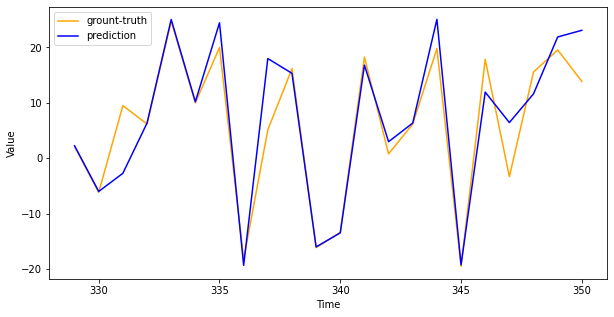

In [114]:
pred = model_rnn.predict(X_test)

pred_range = np.arange(len(y_train_partial), len(y_train_partial) + len(pred))

plt.figure(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='grount-truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

In [118]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM
from tensorflow.keras.models import Sequential

model_lstm = Sequential([
    LSTM(32, return_sequences=True, input_shape=(n, 1)),
    LSTM(32),
    Dense(1, activation='linear')
])

model_lstm.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])
model_lstm.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 10, 32)            4352      
_________________________________________________________________
lstm_28 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [119]:
model_lstm.fit(X_train_partial, y_train_partial,
          epochs=500,
          batch_size=64,
          validation_split=0.2)

Train on 263 samples, validate on 66 samples
Epoch 1/500
263/263 [==============================] - 7s 26ms/sample - loss: 243.3516 - mae: 13.2319 - val_loss: 301.0817 - val_mae: 14.9108
Epoch 2/500
263/263 [==============================] - 0s 960us/sample - loss: 235.4670 - mae: 13.0274 - val_loss: 291.7976 - val_mae: 14.6890
Epoch 3/500
263/263 [==============================] - 0s 977us/sample - loss: 228.5183 - mae: 12.8373 - val_loss: 282.9181 - val_mae: 14.4722
Epoch 4/500
263/263 [==============================] - 0s 960us/sample - loss: 222.0979 - mae: 12.6606 - val_loss: 274.6317 - val_mae: 14.2773
Epoch 5/500
263/263 [==============================] - 0s 1ms/sample - loss: 216.1466 - mae: 12.5097 - val_loss: 266.9824 - val_mae: 14.0905
Epoch 6/500
263/263 [==============================] - 0s 1ms/sample - loss: 210.0341 - mae: 12.3424 - val_loss: 258.6905 - val_mae: 13.8784
Epoch 7/500
263/263 [==============================] - 0s 1ms/sample - loss: 203.7633 - mae: 12.1606 -

In [120]:
model_lstm.evaluate(X_test, y_test, verbose=2)

22/1 - 0s - loss: 19.5530 - mae: 2.5237


[19.552997589111328, 2.5236523]

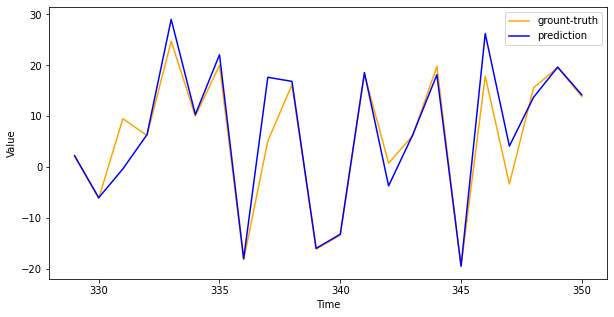

In [121]:
pred = model_lstm.predict(X_test)

pred_range = np.arange(len(y_train_partial), len(y_train_partial) + len(pred))

plt.figure(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='grount-truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

In [123]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

model_gru = Sequential([
    GRU(32, return_sequences=True, input_shape=(n, 1)),
    GRU(32),
    Dense(1, activation='linear')
])

model_gru.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])
model_gru.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 10, 32)            3360      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [124]:
model_gru.fit(X_train_partial, y_train_partial,
          epochs=500,
          batch_size=64,
          validation_split=0.2)

Train on 263 samples, validate on 66 samples
Epoch 1/500
263/263 [==============================] - 7s 27ms/sample - loss: 249.0181 - mae: 13.3826 - val_loss: 302.5553 - val_mae: 14.9171
Epoch 2/500
263/263 [==============================] - 0s 889us/sample - loss: 234.9607 - mae: 12.9785 - val_loss: 286.5765 - val_mae: 14.4851
Epoch 3/500
263/263 [==============================] - 0s 880us/sample - loss: 222.6630 - mae: 12.6156 - val_loss: 270.4995 - val_mae: 14.0381
Epoch 4/500
263/263 [==============================] - 0s 883us/sample - loss: 210.0626 - mae: 12.2399 - val_loss: 254.8836 - val_mae: 13.6271
Epoch 5/500
263/263 [==============================] - 0s 953us/sample - loss: 198.5450 - mae: 11.8982 - val_loss: 239.7762 - val_mae: 13.2422
Epoch 6/500
263/263 [==============================] - 0s 881us/sample - loss: 187.1003 - mae: 11.5631 - val_loss: 225.9350 - val_mae: 12.8674
Epoch 7/500
263/263 [==============================] - 0s 871us/sample - loss: 176.8613 - mae: 11.

In [125]:
model_gru.evaluate(X_test, y_test, verbose=2)

22/1 - 0s - loss: 41.0699 - mae: 3.6134


[41.06990051269531, 3.6133866]

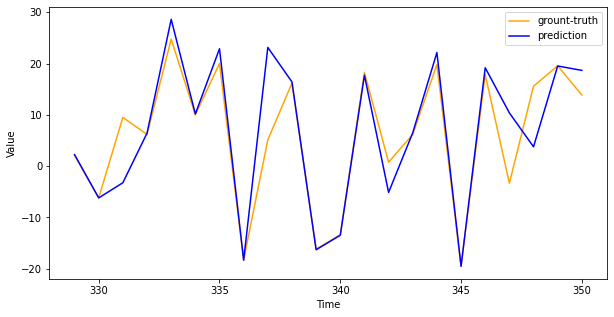

In [126]:
pred = model_gru.predict(X_test)

pred_range = np.arange(len(y_train_partial), len(y_train_partial) + len(pred))

plt.figure(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='grount-truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()